In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("D:\h1n1_vaccine_prediction.csv")
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [18]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

(array([8233.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3561.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

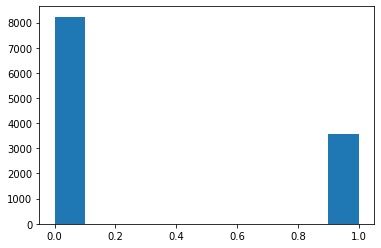

In [66]:
plt.hist(data['h1n1_vaccine'])

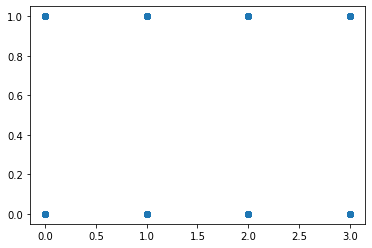

In [64]:
plt.scatter(data['no_of_adults'], data['h1n1_vaccine'])

In [19]:
data.drop(['unique_id'],axis=1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [20]:
data = data.dropna()

In [21]:
d = data.info()
d

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [22]:
data.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

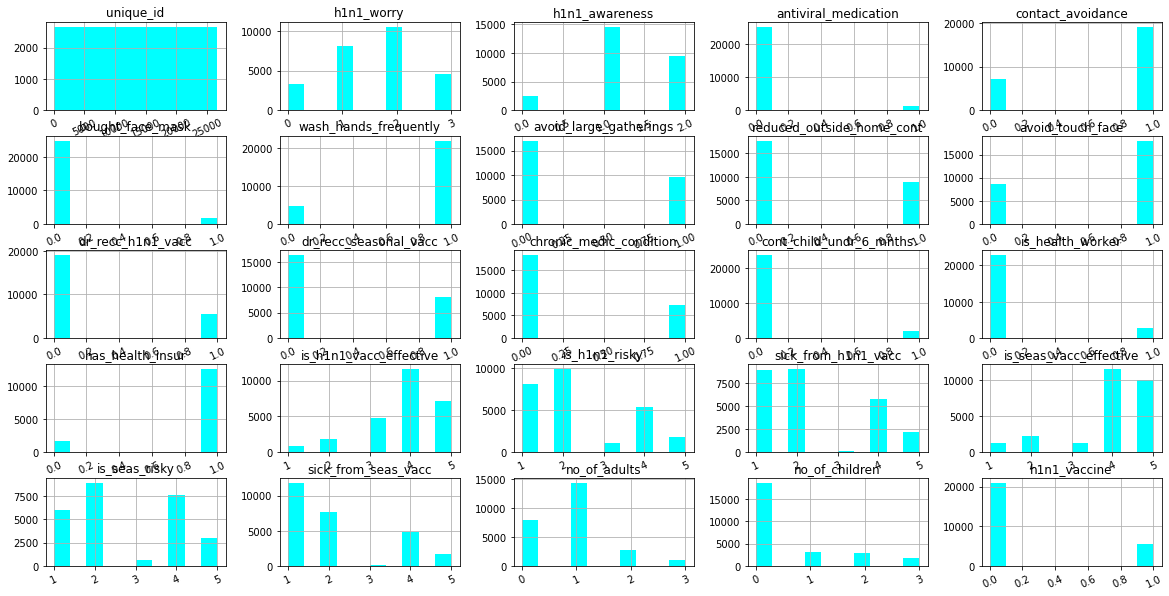

In [9]:
data.hist(xrot=25, figsize=(20,10),color='cyan')
plt.show()

In [23]:
x = data.drop(['h1n1_vaccine'],axis=1)
y = data['h1n1_vaccine']

In [24]:
X = pd.get_dummies(x)

In [25]:
X.isna().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                    

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               11794 non-null  int64  
 1   h1n1_worry                              11794 non-null  float64
 2   h1n1_awareness                          11794 non-null  float64
 3   antiviral_medication                    11794 non-null  float64
 4   contact_avoidance                       11794 non-null  float64
 5   bought_face_mask                        11794 non-null  float64
 6   wash_hands_frequently                   11794 non-null  float64
 7   avoid_large_gatherings                  11794 non-null  float64
 8   reduced_outside_home_cont               11794 non-null  float64
 9   avoid_touch_face                        11794 non-null  float64
 10  dr_recc_h1n1_vacc                       11794 non-null  fl

In [27]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 11794 entries, 0 to 26706
Series name: h1n1_vaccine
Non-Null Count  Dtype
--------------  -----
11794 non-null  int64
dtypes: int64(1)
memory usage: 184.3 KB


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
pre = model.predict(X_test)
pre

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
model.predict_proba(X_test)

array([[0.72645895, 0.27354105],
       [0.89853146, 0.10146854],
       [0.94863741, 0.05136259],
       ...,
       [0.84098683, 0.15901317],
       [0.16137648, 0.83862352],
       [0.89000469, 0.10999531]])

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
accuracy_score(y_test,pre)

0.8152542372881356

In [58]:
confusion_matrix(y_test, pre)

array([[1144,  100],
       [ 227,  299]], dtype=int64)

In [59]:
z = classification_report(y_test, pre)
print(z)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1244
           1       0.75      0.57      0.65       526

    accuracy                           0.82      1770
   macro avg       0.79      0.74      0.76      1770
weighted avg       0.81      0.82      0.81      1770



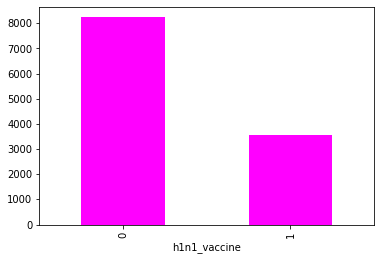

In [75]:
import matplotlib.pyplot as plt
data.groupby('h1n1_vaccine').h1n1_vaccine.count().plot(kind='bar', color='magenta')
plt.show()